In [146]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [147]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns

In [148]:
df_purchase=pd.read_csv(r"C:\Users\lavan\Downloads\QVI_purchase_behaviour.csv")

In [149]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [150]:
df_purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [214]:
df_purchase['LIFESTAGE'] = df_purchase['LIFESTAGE'].str.lower().str.strip()
df_purchase['PREMIUM_CUSTOMER'] = df_purchase['PREMIUM_CUSTOMER'].str.lower().str.strip()

In [217]:
df_purchase['LIFESTAGE'].unique()

array(['young singles/couples', 'young families', 'older singles/couples',
       'midage singles/couples', 'new families', 'older families',
       'retirees'], dtype=object)

In [220]:
lifestage_counts=df_purchase.groupby('LIFESTAGE').value_counts()
lifestage_counts

LIFESTAGE               LYLTY_CARD_NBR  PREMIUM_CUSTOMER
midage singles/couples  1005            mainstream          1
                        1023            premium             1
                        1026            premium             1
                        1052            budget              1
                        1053            mainstream          1
                                                           ..
young singles/couples   2330041         mainstream          1
                        2330311         budget              1
                        2330321         mainstream          1
                        2370181         mainstream          1
                        2373711         mainstream          1
Name: count, Length: 72637, dtype: int64

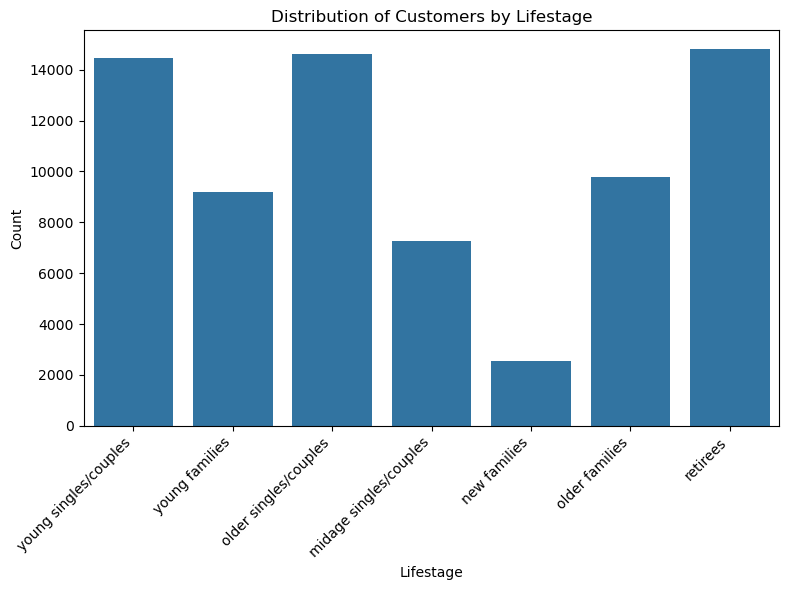

In [222]:
# 3. Plotting with Seaborn (more visually appealing)
plt.figure(figsize=(8, 6))
sns.countplot(x='LIFESTAGE', data=df_purchase)  # Easier syntax with Seaborn
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.title('Distribution of Customers by Lifestage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [226]:
df_purchase.groupby('LIFESTAGE').size()

LIFESTAGE
midage singles/couples     7275
new families               2549
older families             9780
older singles/couples     14609
retirees                  14805
young families             9178
young singles/couples     14441
dtype: int64

In [227]:
#PREMIUM_CUSTOMER inspection

In [224]:
df_purchase.groupby('PREMIUM_CUSTOMER').size()

PREMIUM_CUSTOMER
budget        24470
mainstream    29245
premium       18922
dtype: int64

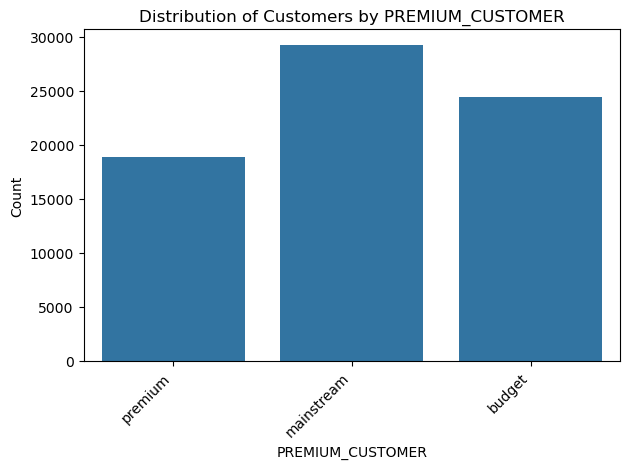

In [228]:
sns.countplot(x='PREMIUM_CUSTOMER', data=df_purchase)  # Easier syntax with Seaborn
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('Count')
plt.title('Distribution of Customers by PREMIUM_CUSTOMER')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [215]:
df_purchase.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,young singles/couples,premium
1,1002,young singles/couples,mainstream


## QVI_transaction_data

In [ ]:
#converted date column in excel

In [230]:
df_trans=pd.read_excel(r"C:\Users\lavan\Downloads\QVI_transaction_data.xlsx")

In [231]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [232]:
df_trans.DATE.isnull().sum()

0

In [233]:
#change date format from yymmdd to ddmmyy

In [234]:
df_trans.DATE=df_trans.DATE.dt.strftime('%d-%m-%Y')

In [235]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Missing Values
#checking null values

In [237]:
df_trans.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [238]:
df_trans.dtypes

DATE               object
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [239]:
#new column product weight from splitting product name

In [240]:
df_trans['PROD_WEIGHT']=df_trans['PROD_NAME'].str.extract(r'(\d+)g', expand=False)

In [241]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [242]:
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].apply(lambda x: x[:-4] if len(x)>=5 else x)

In [243]:
df_trans.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [244]:
df_trans.duplicated().any()

True

In [245]:
df_trans.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_WEIGHT'],
      dtype='object')

In [246]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
 8   PROD_WEIGHT     258772 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 18.2+ MB


In [247]:
df_trans.isnull().sum()/len(df_trans)

DATE              0.000000
STORE_NBR         0.000000
LYLTY_CARD_NBR    0.000000
TXN_ID            0.000000
PROD_NBR          0.000000
PROD_NAME         0.000000
PROD_QTY          0.000000
TOT_SALES         0.000000
PROD_WEIGHT       0.022897
dtype: float64

In [248]:
#inspecting the null product weight rows
#since product weight has 0.022897 missing values which has less contribution hence deleting the rows


In [249]:
df_trans[df_trans['PROD_WEIGHT'].isna()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT
9,18-08-2018,7,7150,6900,52,Grain Waves Sour Cream&Chives,2,7.2,NaN
34,16-08-2018,51,51100,46802,48,Red Rock Deli Sp Salt & Truffle,1,2.7,NaN
35,19-08-2018,51,51100,46803,37,Smiths Thinly Swt Chli&S/Cream,1,3.0,NaN
212,13-03-2019,1,1348,391,48,Red Rock Deli Sp Salt & Truffle,1,2.7,NaN
292,02-09-2018,5,5018,4465,52,Grain Waves Sour Cream&Chives,2,7.2,NaN
...,...,...,...,...,...,...,...,...,...
264573,24-03-2019,261,261035,259859,52,Grain Waves Sour Cream&Chives,2,7.2,NaN
264635,01-01-2019,264,264268,263026,52,Grain Waves Sour Cream&Chives,1,3.6,NaN
264705,25-06-2019,266,266088,263925,52,Grain Waves Sour Cream&Chives,1,3.6,NaN
264733,11-05-2019,266,266432,264264,48,Red Rock Deli Sp Salt & Truffle,1,2.7,NaN


In [250]:
df_trans.PROD_WEIGHT=df_trans['PROD_WEIGHT'].dropna()

In [251]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [252]:
df_cleaned = df_trans.dropna(subset=['PROD_WEIGHT'])

In [253]:
df_cleaned[df_cleaned['PROD_WEIGHT'].isna()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT


In [254]:
df_cleaned.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PROD_WEIGHT       0
dtype: int64

In [255]:
df_cleaned.count()

DATE              258772
STORE_NBR         258772
LYLTY_CARD_NBR    258772
TXN_ID            258772
PROD_NBR          258772
PROD_NAME         258772
PROD_QTY          258772
TOT_SALES         258772
PROD_WEIGHT       258772
dtype: int64

In [257]:

df_cleaned['PROD_NAME']=df_cleaned['PROD_NAME'].str.lower()

C:\Users\lavan\AppData\Local\Temp\ipykernel_9852\3163247834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PROD_NAME']=df_cleaned['PROD_NAME'].str.lower()


In [258]:
df_cleaned.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT
0,17-10-2018,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,14-05-2019,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,20-05-2019,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,17-08-2018,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175
4,18-08-2018,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150


In [268]:
df_cleaned.dtypes

DATE               object
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
PROD_WEIGHT         int32
dtype: object

In [259]:
df_cleaned['PROD_NAME'].duplicated().any()

True

In [267]:
df_cleaned.PROD_WEIGHT=df_cleaned.PROD_WEIGHT.astype(int)

C:\Users\lavan\AppData\Local\Temp\ipykernel_9852\1397434523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.PROD_WEIGHT=df_cleaned.PROD_WEIGHT.astype(int)


## Merge two excels

In [287]:
df_merged = df_cleaned.merge(df_purchase, on='LYLTY_CARD_NBR', how='inner')

In [288]:
df_merged.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_WEIGHT', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [290]:
df_merged.isnull().sum()/len(df_merged)

DATE                0.0
STORE_NBR           0.0
LYLTY_CARD_NBR      0.0
TXN_ID              0.0
PROD_NBR            0.0
PROD_NAME           0.0
PROD_QTY            0.0
TOT_SALES           0.0
PROD_WEIGHT         0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64

In [292]:
df_merged.duplicated().any()

True

In [301]:
df_merged.value_counts()

DATE        STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME                             PROD_QTY  TOT_SALES  PROD_WEIGHT  LIFESTAGE              PREMIUM_CUSTOMER
01-10-2018  107        107024          108462  45        smiths thinly cut   roast chicken     2         6.0        175          older singles/couples  premium             2
01-01-2019  1          1211            245     30        doritos corn chips  cheese supreme    1         4.4        170          older singles/couples  premium             1
21-03-2019  212        212150          211306  4         dorito corn chp     supreme           2         13.0       380          older singles/couples  mainstream          1
            208        208218          207399  67        rrd chilli&         coconut           2         5.4        150          older families         budget              1
            209        209020          207604  61        smiths crinkle cut  chips chicken     2         5.8        170          young 

##Check for and handle outliers in numerical columns (PROD_QTY, TOT_SALES, PROD_WEIGHT).

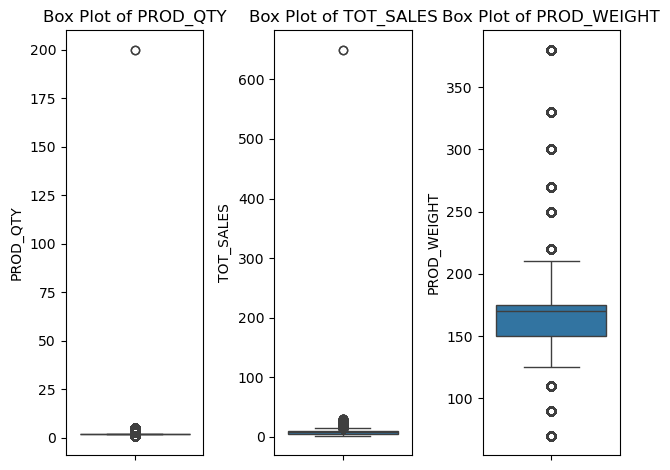

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.boxplot(y=df_merged['PROD_QTY'])
plt.title('Box Plot of PROD_QTY')
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.boxplot(y=df_merged['TOT_SALES'])
plt.title('Box Plot of TOT_SALES')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.boxplot(y=df_merged['PROD_WEIGHT'])
plt.title('Box Plot of PROD_WEIGHT')

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

#prod_quantity and total_sales have outliers

In [303]:
# Calculate IQR and whisker bounds for PROD_QTY
q1 = df_merged['PROD_QTY'].quantile(0.25)
q3 = df_merged['PROD_QTY'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")

# Print the actual values of the outliers
outliers_prod_qty = df_merged[(df_merged['PROD_QTY'] < lower_bound) | (df_merged['PROD_QTY'] > upper_bound)]['PROD_QTY']
print("\nOutlier values for PROD_QTY")
print(outliers_prod_qty)

Q1: 2.0
Q3: 2.0
IQR: 0.0
Upper Bound: 2.0
Lower Bound: 2.0

Outlier values for PROD_QTY
1         3
3         5
4         3
5         1
6         1
         ..
258690    1
258691    1
258692    1
258760    1
258768    1
Name: PROD_QTY, Length: 28133, dtype: int64


In [304]:
# Calculate IQR and whisker bounds for PROD_weight
q1 = df_merged['PROD_WEIGHT'].quantile(0.25)
q3 = df_merged['PROD_WEIGHT'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")

# Print the actual values of the outliers
outliers_prod_qty = df_merged[(df_merged['PROD_WEIGHT'] < lower_bound) | (df_merged['PROD_WEIGHT'] > upper_bound)]['PROD_WEIGHT']
print("\nOutlier values for PROD_WEIGHT")
print(outliers_prod_qty)

Q1: 150.0
Q3: 175.0
IQR: 25.0
Upper Bound: 212.5
Lower Bound: 112.5

Outlier values for PROD_WEIGHT
5         300
6         330
9         330
11        270
15        220
         ... 
258754    110
258761    110
258762    110
258763    110
258765    110
Name: PROD_WEIGHT, Length: 72044, dtype: int32


In [305]:
# Calculate IQR and whisker bounds for PROD_QTY
q1 = df_merged['TOT_SALES'].quantile(0.25)
q3 = df_merged['TOT_SALES'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")

# Print the actual values of the outliers
outliers_prod_qty = df_merged[(df_merged['TOT_SALES'] < lower_bound) | (df_merged['TOT_SALES'] > upper_bound)]['TOT_SALES']
print("\nOutlier values for TOT_SALES")
print(outliers_prod_qty)

Q1: 5.4
Q3: 9.2
IQR: 3.799999999999999
Upper Bound: 14.899999999999999
Lower Bound: -0.29999999999999805

Outlier values for TOT_SALES
3         15.0
10        23.0
53        15.5
69        28.5
97        19.0
          ... 
252743    15.2
252796    21.6
252802    18.4
252807    16.5
252866    18.5
Name: TOT_SALES, Length: 571, dtype: float64


In [306]:
columns_to_check = ['PROD_QTY', 'TOT_SALES', 'PROD_WEIGHT']
df_trans_filtered_multiple = df_merged.copy()

for col in columns_to_check:
    q1 = df_trans_filtered_multiple[col].quantile(0.25)
    q3 = df_trans_filtered_multiple[col].quantile(0.75)
    iqr = q3 - q1
    df_trans_filtered_multiple = df_trans_filtered_multiple[
        (df_trans_filtered_multiple[col] >= (q1 - 1.5 * iqr)) &
        (df_trans_filtered_multiple[col] <= (q3 + 1.5 * iqr))
    ]

print(df_trans_filtered_multiple.shape)

(166168, 11)


Text(0, 0.5, 'Frequency')

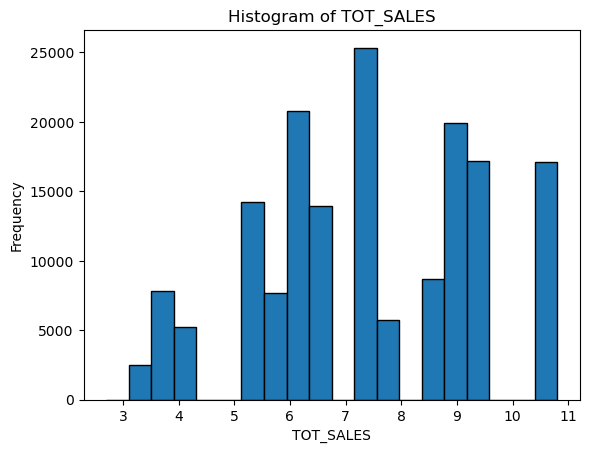

In [307]:
plt.hist(df_trans_filtered_multiple['TOT_SALES'], bins=20, edgecolor='black')
plt.title('Histogram of TOT_SALES')
plt.xlabel('TOT_SALES')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

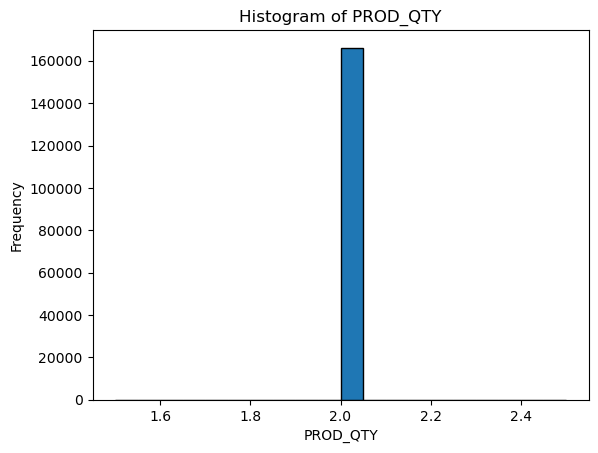

In [308]:
plt.hist(df_trans_filtered_multiple['PROD_QTY'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of PROD_QTY')
plt.xlabel('PROD_QTY')
plt.ylabel('Frequency')


In [309]:
df_trans_filtered_multiple.info

<bound method DataFrame.info of               DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       17-10-2018          1            1000       1         5   
2       20-05-2019          1            1343     383        61   
23      15-08-2018         38           38142   34181       108   
25      19-08-2018         39           39167   35638       111   
31      20-05-2019         45           45127   41122        64   
...            ...        ...             ...     ...       ...   
258766  12-11-2018        272          272319  270087        44   
258767  09-03-2019        272          272319  270088        89   
258769  06-11-2018        272          272379  270187        51   
258770  27-12-2018        272          272379  270188        42   
258771  22-09-2018        272          272380  270189        74   

                                   PROD_NAME  PROD_QTY  TOT_SALES  \
0         natural chip        compny seasalt         2        6.0   
2         smiths crinkle 

In [310]:
df_trans_filtered_multiple.dtypes

DATE                 object
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PROD_WEIGHT           int32
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [311]:
df_trans_filtered_multiple['PROD_WEIGHT'] = df_trans_filtered_multiple['PROD_WEIGHT'].astype('Int64') 

Text(0, 0.5, 'Frequency')

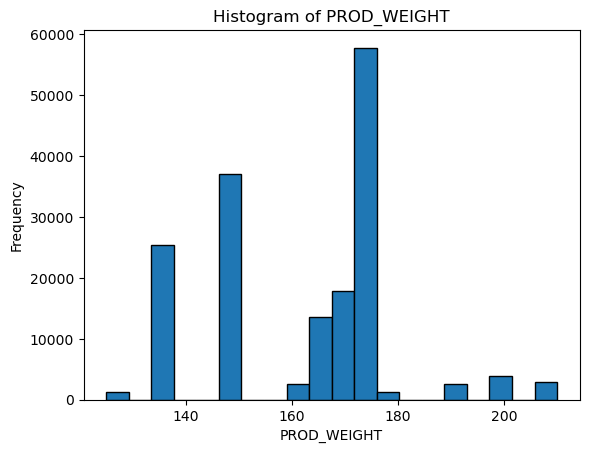

In [312]:

plt.hist(df_trans_filtered_multiple['PROD_WEIGHT'], bins=20, edgecolor='black')
plt.title('Histogram of PROD_WEIGHT')
plt.xlabel('PROD_WEIGHT')
plt.ylabel('Frequency')

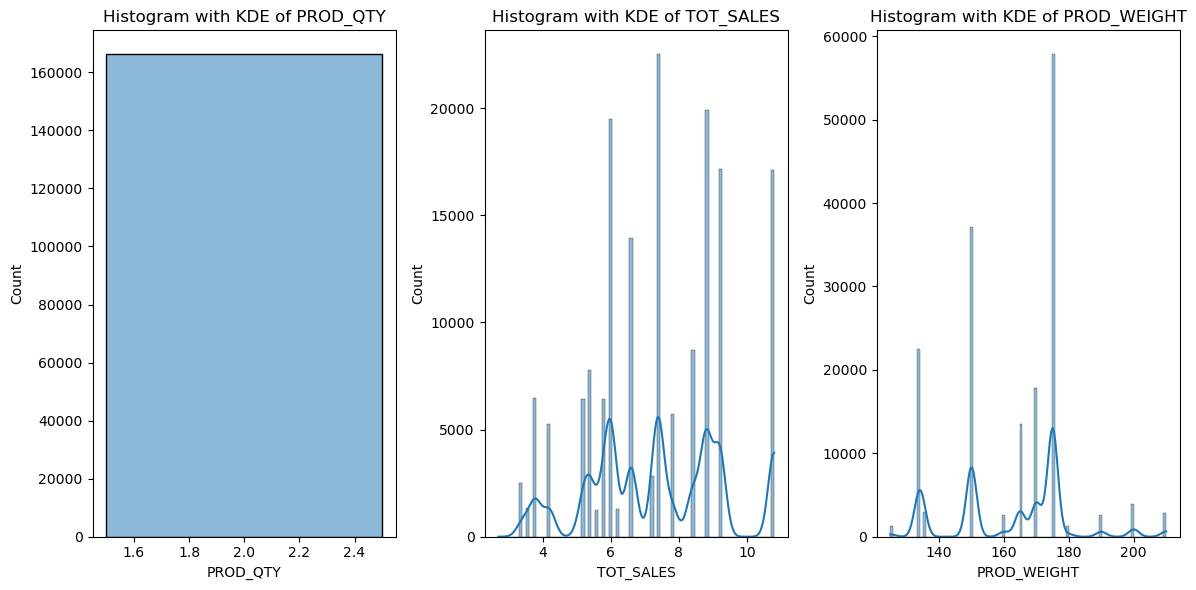

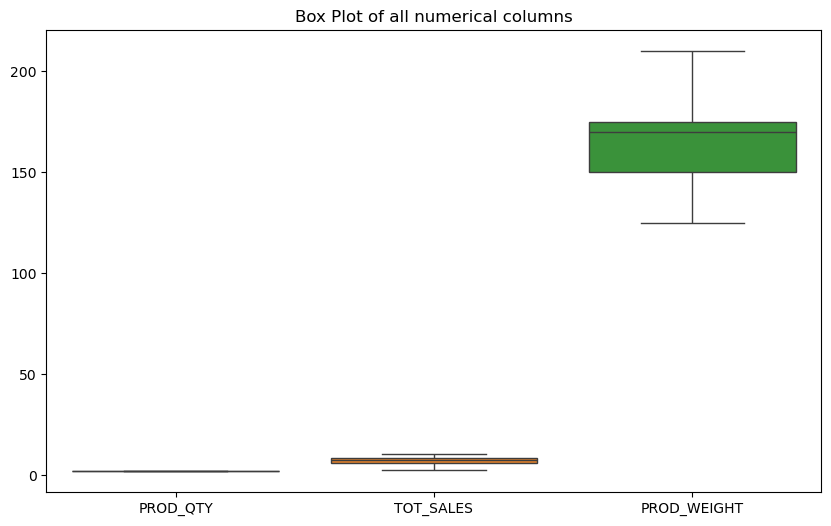

In [314]:
# 3. Combined Histogram and KDE (using Seaborn)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_trans_filtered_multiple['PROD_QTY'], kde=True)
plt.title('Histogram with KDE of PROD_QTY')

plt.subplot(1, 3, 2)
sns.histplot(df_trans_filtered_multiple['TOT_SALES'], kde=True)
plt.title('Histogram with KDE of TOT_SALES')

plt.subplot(1, 3, 3)
sns.histplot(df_trans_filtered_multiple['PROD_WEIGHT'], kde=True)
plt.title('Histogram with KDE of PROD_WEIGHT')

plt.tight_layout()
plt.show()

# 4. Boxplot on one graph (using Seaborn)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_trans_filtered_multiple[['PROD_QTY','TOT_SALES','PROD_WEIGHT']])
plt.title('Box Plot of all numerical columns')
plt.show()

In [315]:
df_trans_filtered_multiple.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_WEIGHT
count,166168.000000,1.661680e+05,1.661680e+05,166168.000000,166168.0,166168.000000,166168.0
mean,135.269956,1.356693e+05,1.353636e+05,60.103672,2.0,7.338569,162.658316
std,76.077349,7.907821e+04,7.752576e+04,32.420316,0.0,1.948375,17.767177
min,1.000000,1.000000e+03,1.000000e+00,1.000000,2.0,2.700000,125.0
25%,70.000000,7.014200e+04,6.831375e+04,32.000000,2.0,6.000000,150.0
50%,130.000000,1.301515e+05,1.342830e+05,62.000000,2.0,7.400000,170.0
75%,203.000000,2.031432e+05,2.028705e+05,88.000000,2.0,8.800000,175.0
max,272.000000,2.370961e+06,2.415841e+06,114.000000,2.0,10.800000,210.0


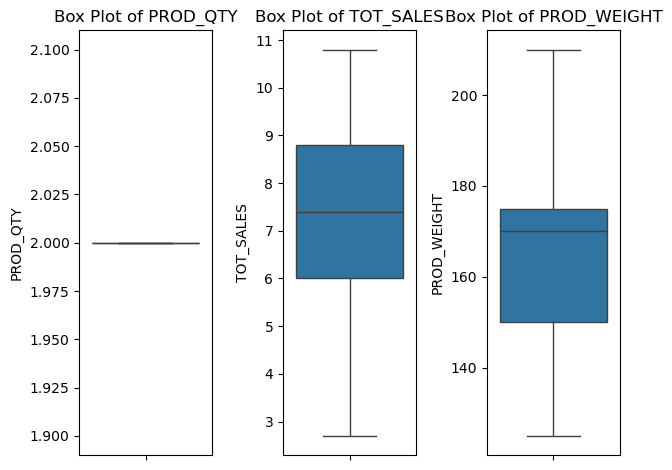

In [316]:

plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.boxplot(y=df_trans_filtered_multiple['PROD_QTY'])
plt.title('Box Plot of PROD_QTY')
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.boxplot(y=df_trans_filtered_multiple['TOT_SALES'])
plt.title('Box Plot of TOT_SALES')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.boxplot(y=df_trans_filtered_multiple['PROD_WEIGHT'])
plt.title('Box Plot of PROD_WEIGHT')

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

In [317]:
df_trans_filtered_multiple.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_WEIGHT', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [318]:
df_trans_filtered_multiple.value_counts()

DATE        STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME                            PROD_QTY  TOT_SALES  PROD_WEIGHT  LIFESTAGE               PREMIUM_CUSTOMER
01-10-2018  107        107024          108462  45        smiths thinly cut   roast chicken    2         6.0        175          older singles/couples   premium             2
01-01-2019  3          3217            2038    50        tostitos lightly    salted           2         8.8        175          retirees                budget              1
21-06-2019  241        241036          244747  50        tostitos lightly    salted           2         8.8        175          older singles/couples   premium             1
                       241123          245262  89        kettle sweet chilli and sour cream   2         10.8       175          young families          budget              1
                       241185          245619  66        ccs nacho cheese                     2         4.2        175          older f

In [320]:
df=df_trans_filtered_multiple.drop(columns='DATE')

In [321]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features=['STORE_NBR', 'LYLTY_CARD_NBR', 'PROD_NBR','PROD_QTY', 'TOT_SALES', 'PROD_WEIGHT']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 5. Apply K-means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) #n_init is added to remove warning. It is recommended to set n_init to 'auto' or a number >10
df['cluster'] = kmeans.fit_predict(df[numerical_features]) 

print(df.head())

#Analyze the clusters
print(df['cluster'].value_counts())

    STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   -1.764919       -1.702994       1 -1.699670   
2   -1.764919       -1.698656     383  0.027647   
23  -1.278570       -1.233306   34181  1.477360   
25  -1.265426       -1.220344   35638  1.569895   
31  -1.186559       -1.144975   41122  0.120182   

                               PROD_NAME  PROD_QTY  TOT_SALES  PROD_WEIGHT  \
0     natural chip        compny seasalt       0.0  -0.687020     0.694636   
2     smiths crinkle cut  chips chicken        0.0  -2.278094     0.413217   
23  kettle tortilla chpshny&jlpno chili        0.0   0.955379    -0.712457   
25     smiths chip thinly  cut original        0.0  -0.687020     0.694636   
31  red rock deli sr    salsa & mzzrlla        0.0  -0.994970    -0.712457   

                 LIFESTAGE PREMIUM_CUSTOMER  cluster  
0    young singles/couples          premium        0  
2   midage singles/couples           budget        0  
23  midage singles/couples           budget        4  
25  

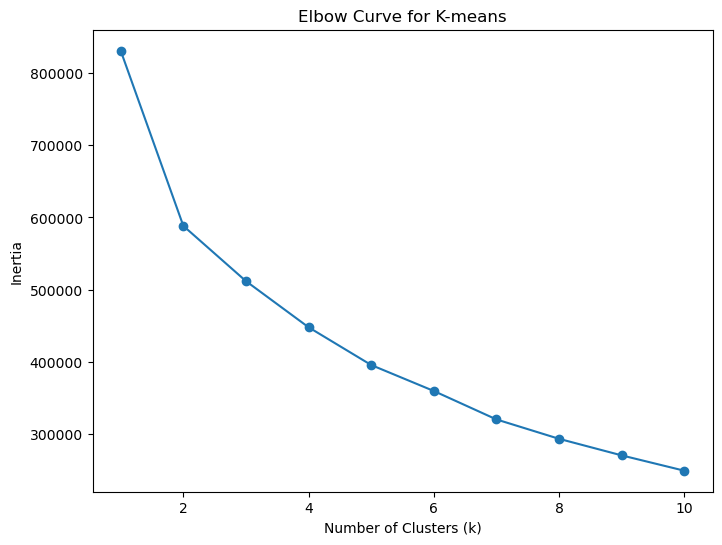

    STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   -1.764919       -1.702994       1 -1.699670   
2   -1.764919       -1.698656     383  0.027647   
23  -1.278570       -1.233306   34181  1.477360   
25  -1.265426       -1.220344   35638  1.569895   
31  -1.186559       -1.144975   41122  0.120182   

                               PROD_NAME  PROD_QTY  TOT_SALES  PROD_WEIGHT  \
0     natural chip        compny seasalt       0.0  -0.687020     0.694636   
2     smiths crinkle cut  chips chicken        0.0  -2.278094     0.413217   
23  kettle tortilla chpshny&jlpno chili        0.0   0.955379    -0.712457   
25     smiths chip thinly  cut original        0.0  -0.687020     0.694636   
31  red rock deli sr    salsa & mzzrlla        0.0  -0.994970    -0.712457   

                 LIFESTAGE PREMIUM_CUSTOMER  cluster  
0    young singles/couples          premium        0  
2   midage singles/couples           budget        0  
23  midage singles/couples           budget        4  
25  

In [322]:
#Elbow Method
inertia = []
for k in range(1, 11):  # Try k from 1 to 10 (adjust the range as needed)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_features]) #Fit only on numerical features
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means')
plt.show()


#Apply KMeans with the optimal k (you need to determine this from the elbow curve)
optimal_k = 3 #Example: after looking at the elbow curve you see that k=3 is the optimal number. Change it as needed.
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_trans['cluster'] = kmeans.fit_predict(df[numerical_features])

print(df.head())
print(df['cluster'].value_counts())

In [323]:
df=df_trans.copy()

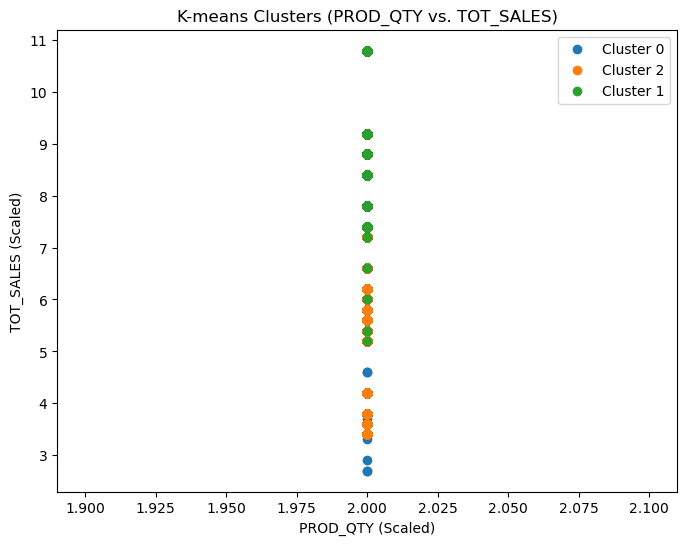

In [324]:
plt.figure(figsize=(8, 6))

# Example 1: PROD_QTY vs. TOT_SALES
for cluster in df_trans['cluster'].unique():
    cluster_data = df_trans[df_trans['cluster'] == cluster]
    plt.scatter(cluster_data['PROD_QTY'], cluster_data['TOT_SALES'], label=f'Cluster {cluster}')

plt.xlabel('PROD_QTY (Scaled)')
plt.ylabel('TOT_SALES (Scaled)')
plt.title('K-means Clusters (PROD_QTY vs. TOT_SALES)')
plt.legend()
plt.show()

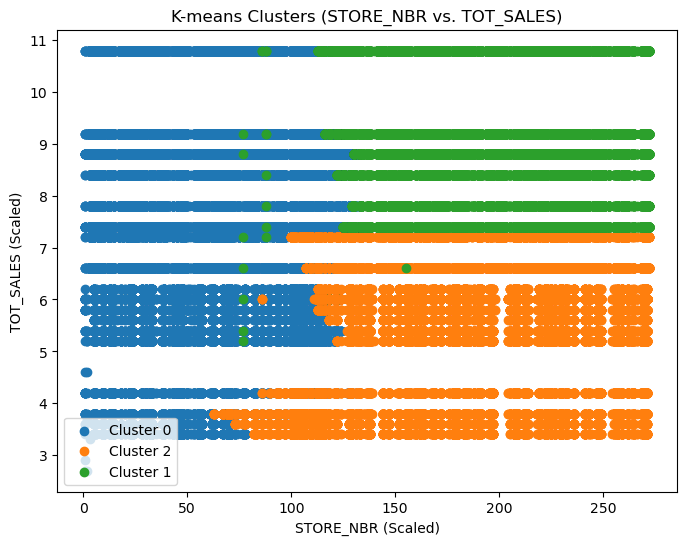

In [325]:
plt.figure(figsize=(8, 6))
#df_trans[numerical_features]
for cluster in df_trans['cluster'].unique():
    cluster_data = df_trans[df_trans['cluster'] == cluster]
    plt.scatter(cluster_data['STORE_NBR'], cluster_data['TOT_SALES'], label=f'Cluster {cluster}')

plt.xlabel('STORE_NBR (Scaled)')
plt.ylabel('TOT_SALES (Scaled)')
plt.title('K-means Clusters (STORE_NBR vs. TOT_SALES)')
plt.legend()
plt.show()

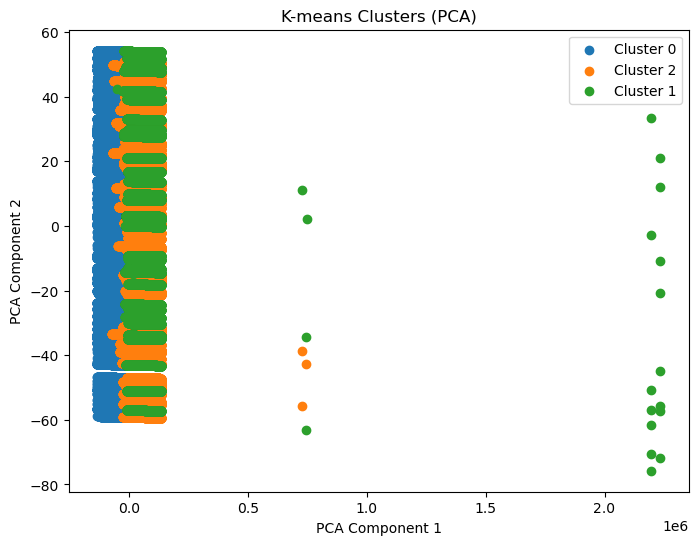

In [326]:



# If you have more than 2 important dimensions, you can use dimensionality reduction (PCA or t-SNE) to project the data into 2D space for visualization.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_trans['pca_1'], df_trans['pca_2'] = zip(*pca.fit_transform(df_trans[numerical_features]))

plt.figure(figsize=(8, 6))
for cluster in df_trans['cluster'].unique():
    cluster_data = df_trans[df_trans['cluster'] == cluster]
    plt.scatter(cluster_data['pca_1'], cluster_data['pca_2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clusters (PCA)')
plt.legend()
plt.show()

he PCA plot reveals three distinct clusters, indicating that customers can be segmented based on underlying patterns in their transaction data.  Cluster 2 exhibits the highest variability along PCA Component 1, suggesting potential differences in purchasing behavior or product preferences.

In [331]:
# 2. Sort the DataFrame by customer and transaction date
df = df_trans_filtered_multiple.sort_values(['LYLTY_CARD_NBR', 'DATE'])

In [334]:

# 1. Convert 'TRANSACTION_DATE' to datetime64
df['TRANSACTION_DATE'] = pd.to_datetime(df['DATE'])

C:\Users\lavan\AppData\Local\Temp\ipykernel_9852\4285178013.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TRANSACTION_DATE'] = pd.to_datetime(df['DATE'])


In [337]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER,TRANSACTION_DATE
0,17-10-2018,1,1000,1,5,natural chip compny seasalt,2,6.0,175,young singles/couples,premium,2018-10-17
232980,09-09-2018,1,1010,10,51,doritos mexicana,2,8.8,170,young singles/couples,mainstream,2018-09-09
97520,29-07-2018,1,1011,12,84,grnwves plus btroot & chilli jam,2,6.2,180,older singles/couples,mainstream,2018-07-29
132579,07-03-2019,1,1013,19,91,ccs tasty cheese,2,4.2,175,retirees,budget,2019-03-07
181294,21-11-2018,1,1025,32,69,smiths chip thinly s/cream&onion,2,6.0,175,young families,budget,2018-11-21


In [338]:
# 3. Calculate the time difference between consecutive transactions for each customer
df['TIME_BETWEEN_TRANSACTIONS'] = df.groupby('LYLTY_CARD_NBR')['TRANSACTION_DATE'].diff()

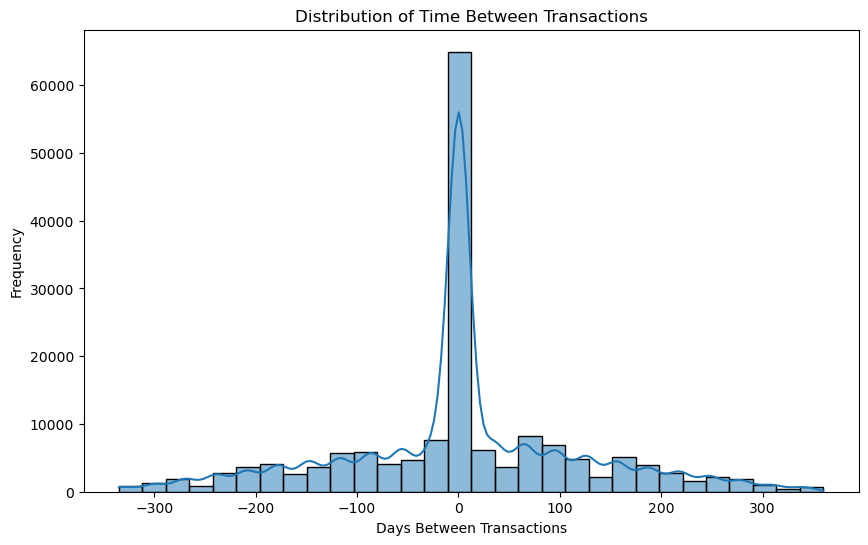

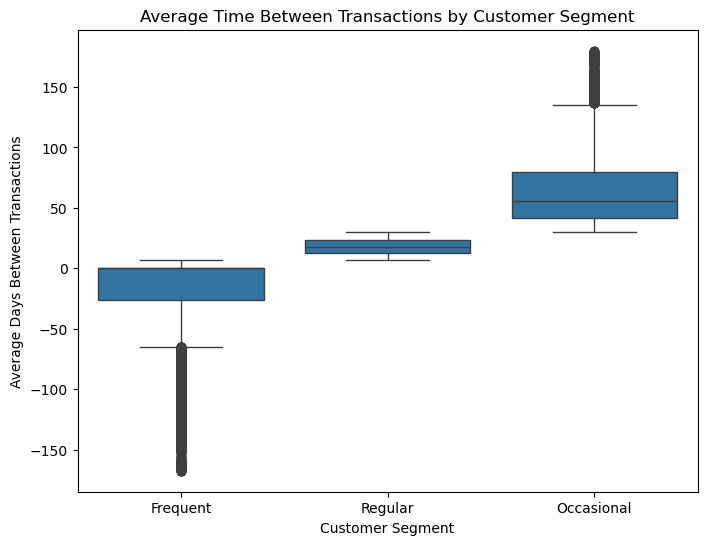

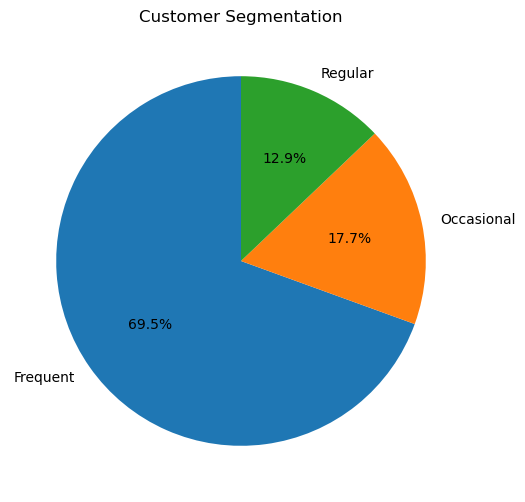

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  17-10-2018          1            1000       1         5   
1  09-09-2018          1            1010      10        51   
2  29-07-2018          1            1011      12        84   
3  07-03-2019          1            1013      19        91   
4  21-11-2018          1            1025      32        69   

                            PROD_NAME  PROD_QTY  TOT_SALES  PROD_WEIGHT  \
0  natural chip        compny seasalt         2        6.0          175   
1                doritos mexicana             2        8.8          170   
2   grnwves plus btroot & chilli jam          2        6.2          180   
3                ccs tasty cheese             2        4.2          175   
4  smiths chip thinly  s/cream&onion          2        6.0          175   

               LIFESTAGE PREMIUM_CUSTOMER TRANSACTION_DATE  \
0  young singles/couples          premium       2018-10-17   
1  young singles/couples       mainstream       2018

In [339]:
# 4. Convert the time difference to days (or another appropriate unit)
df['TIME_BETWEEN_TRANSACTIONS_DAYS'] = df['TIME_BETWEEN_TRANSACTIONS'].dt.days

# 5. Handle the first transaction for each customer (which will have a NaN time difference)
df['TIME_BETWEEN_TRANSACTIONS_DAYS'] = df['TIME_BETWEEN_TRANSACTIONS_DAYS'].fillna(0)  # Or another appropriate value

# 6. Calculate purchase frequency metrics (e.g., average time between transactions)
purchase_frequency = df.groupby('LYLTY_CARD_NBR')['TIME_BETWEEN_TRANSACTIONS_DAYS'].mean().reset_index()
purchase_frequency.rename(columns={'TIME_BETWEEN_TRANSACTIONS_DAYS': 'AVG_TIME_BETWEEN_TRANSACTIONS_DAYS'}, inplace=True)

# 7. Customer Segmentation based on purchase frequency (example)
# Define your segmentation criteria (adjust as needed)
def segment_customer(days):
    if days <= 7:
        return 'Frequent'
    elif days <= 30:
        return 'Regular'
    else:
        return 'Occasional'

purchase_frequency['CUSTOMER_SEGMENT'] = purchase_frequency['AVG_TIME_BETWEEN_TRANSACTIONS_DAYS'].apply(segment_customer)

# 8. Visualization (example)
# a. Distribution of time between transactions
plt.figure(figsize=(10, 6))
sns.histplot(df['TIME_BETWEEN_TRANSACTIONS_DAYS'], bins=30, kde=True)
plt.title('Distribution of Time Between Transactions')
plt.xlabel('Days Between Transactions')
plt.ylabel('Frequency')
plt.show()

# b. Average time between transactions by customer segment
plt.figure(figsize=(8, 6))
sns.boxplot(x='CUSTOMER_SEGMENT', y='AVG_TIME_BETWEEN_TRANSACTIONS_DAYS', data=purchase_frequency)
plt.title('Average Time Between Transactions by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Days Between Transactions')
plt.show()

# c. Number of customers in each segment
segment_counts = purchase_frequency['CUSTOMER_SEGMENT'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segmentation')
plt.show()

# 9. Merge the segment information back into your original DataFrame (optional)
df = pd.merge(df, purchase_frequency, on='LYLTY_CARD_NBR', how='left')

# Now you have the customer segment information in your DataFrame 'df'
print(df.head())

print(purchase_frequency)

In [354]:
top_5_products=df.PROD_NAME.value_counts().nlargest(5)

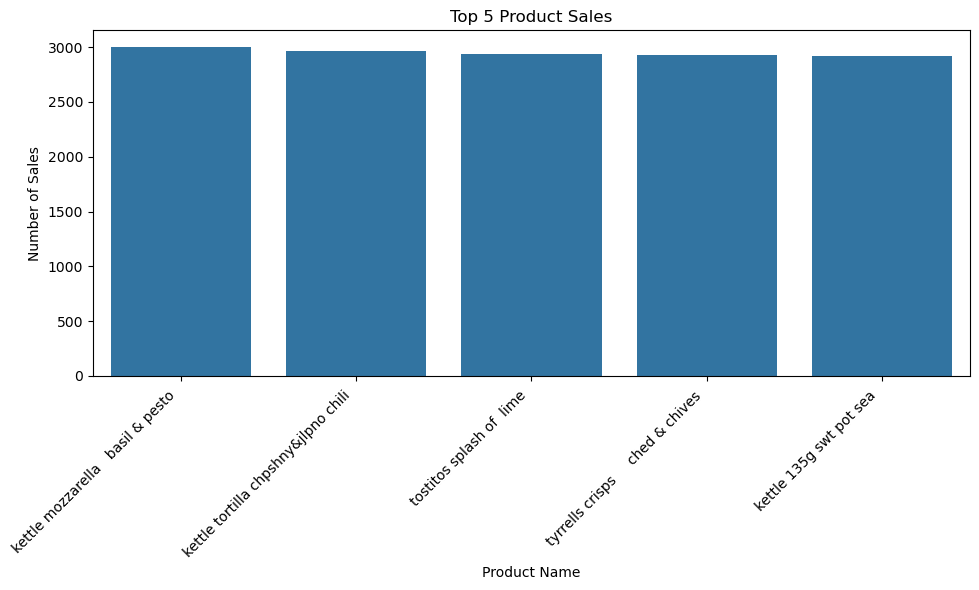

In [355]:
# 2. Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=top_5_products.index, y=top_5_products.values)
plt.title('Top 5 Product Sales')
plt.xlabel('Product Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

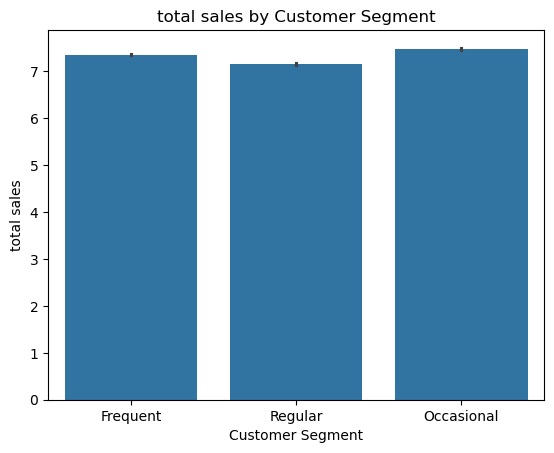

In [345]:
#Analyze sales by customer segment.
#plt.figure(figsize=(8, 6))
sns.barplot(x='CUSTOMER_SEGMENT', y='TOT_SALES', data=df)
plt.title('total sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('total sales')
plt.show()

In [357]:
basket = df.groupby(['TXN_ID', 'PROD_NAME'])['PROD_NAME'].count().unstack().fillna(0).astype(bool)


In [360]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\lavan\anaconda3\lib\site-packages\mask_rcnn-2.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [361]:
# 2. Frequent Itemset Mining (Apriori Algorithm)
from mlxtend.frequent_patterns import apriori
# Find frequent itemsets (combinations of products)
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)  # Adjust min_support as needed


LIFESTAGE
older singles/couples     34458
older families            32086
retirees                  30605
young families            28612
young singles/couples     20709
midage singles/couples    15548
new families               4150
Name: count, dtype: int64

Total Sales by Lifestage:
 LIFESTAGE
midage singles/couples    115259.7
new families               31346.8
older families            228355.6
older singles/couples     255214.0
retirees                  228754.5
young families            204742.7
young singles/couples     155762.0
Name: TOT_SALES, dtype: float64

Average Sales by Lifestage:
 LIFESTAGE
midage singles/couples    7.413153
new families              7.553446
older families            7.116986
older singles/couples     7.406524
retirees                  7.474416
young families            7.155833
young singles/couples     7.521464
Name: TOT_SALES, dtype: float64


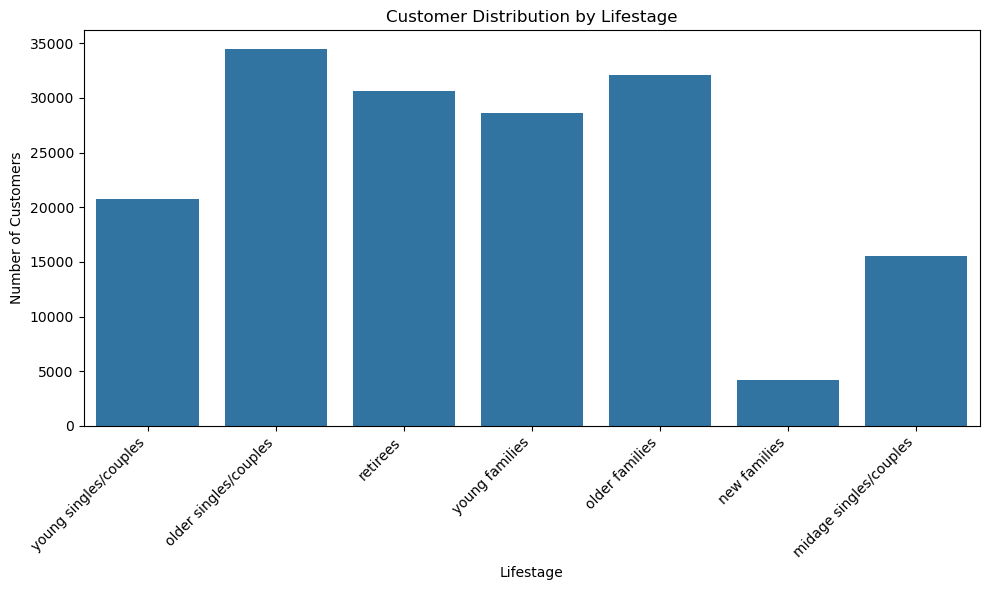

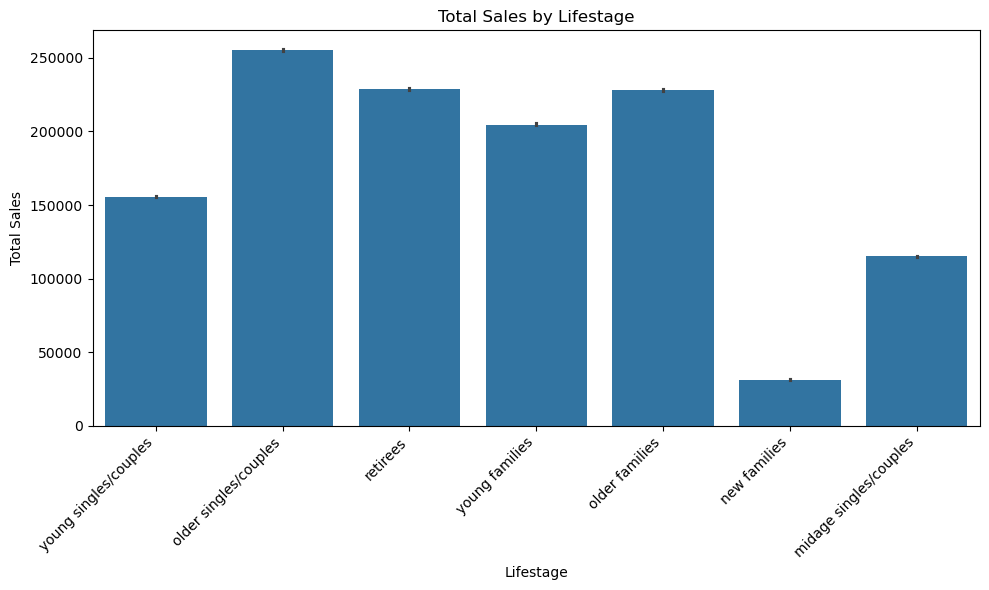

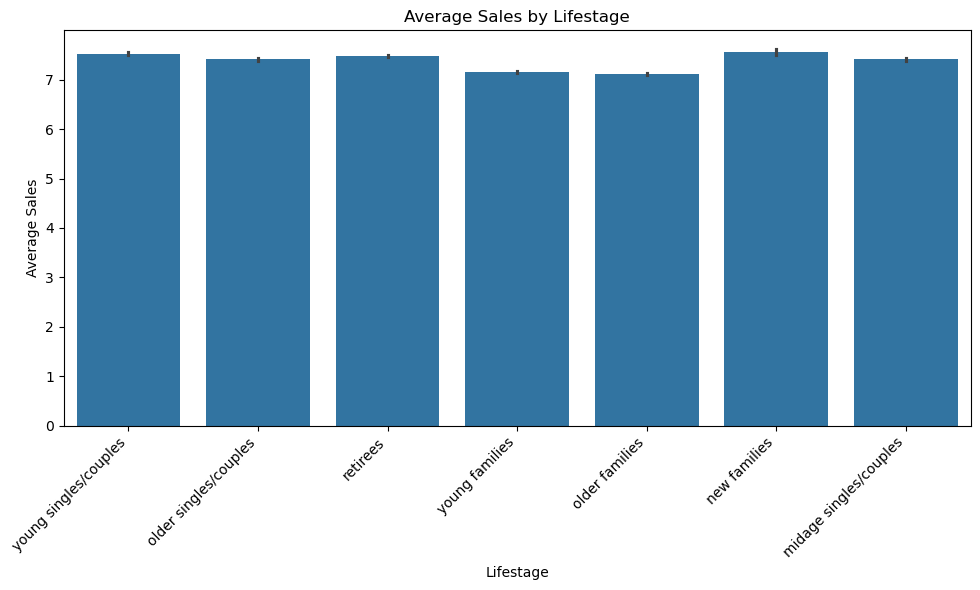

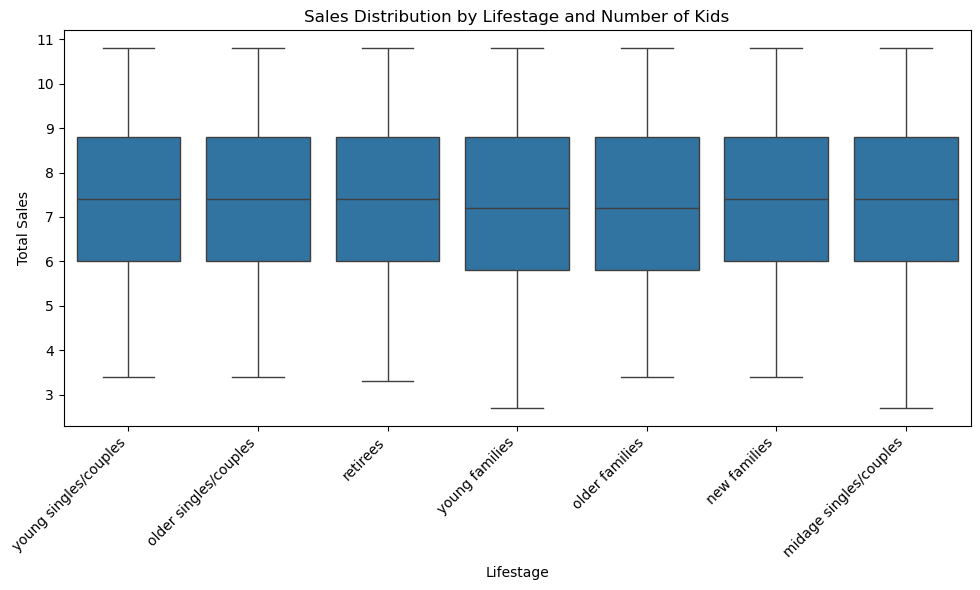


Customer Segments:
 SEGMENT
Other    166168
Name: count, dtype: int64


In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Basic Analysis
print(df['LIFESTAGE'].value_counts())  # Count customers in each lifestage

# 2. Grouping and Aggregation
sales_by_lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].sum()
print("\nTotal Sales by Lifestage:\n", sales_by_lifestage)

avg_sales_by_lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].mean()
print("\nAverage Sales by Lifestage:\n", avg_sales_by_lifestage)

# 3. Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='LIFESTAGE', data=df, order=df['LIFESTAGE'].unique())  # Preserve original order if needed
plt.title('Customer Distribution by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=df, estimator=sum)  # Total sales
plt.title('Total Sales by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=df, estimator='mean')  # Average sales
plt.title('Average Sales by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Combining with other attributes (e.g., NUM_KIDS)
plt.figure(figsize=(10, 6))
sns.boxplot(x='LIFESTAGE', y='TOT_SALES', data=df)  # Sales by lifestage and number of kids
plt.title('Sales Distribution by Lifestage and Number of Kids')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 5. Advanced Analysis (Example: Customer Segmentation)
# You might want to create new customer segments based on LIFESTAGE and other factors
df['SEGMENT'] = df.apply(lambda row: 'Family with Young Kids' if 'Young families' in row['LIFESTAGE'] and row['NUM_KIDS'] > 0 else 'Other', axis=1)
print("\nCustomer Segments:\n", df['SEGMENT'].value_counts())


# ... (Further analysis and modeling) ...

In [365]:
# 1. Basic Analysis
print(df['PREMIUM_CUSTOMER'].value_counts())  # Count customers in each segment

# 2. Grouping and Aggregation
sales_by_premium = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
print("\nTotal Sales by Premium Segment:\n", sales_by_premium)

avg_sales_by_premium = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()
print("\nAverage Sales by Premium Segment:\n", avg_sales_by_premium)

PREMIUM_CUSTOMER
mainstream    63353
budget        58980
premium       43835
Name: count, dtype: int64

Total Sales by Premium Segment:
 PREMIUM_CUSTOMER
budget        429657.4
mainstream    469610.7
premium       320167.2
Name: TOT_SALES, dtype: float64

Average Sales by Premium Segment:
 PREMIUM_CUSTOMER
budget        7.284798
mainstream    7.412604
premium       7.303917
Name: TOT_SALES, dtype: float64


In [366]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER,TRANSACTION_DATE,TIME_BETWEEN_TRANSACTIONS,TIME_BETWEEN_TRANSACTIONS_DAYS,AVG_TIME_BETWEEN_TRANSACTIONS_DAYS,CUSTOMER_SEGMENT,SEGMENT
0,17-10-2018,1,1000,1,5,natural chip compny seasalt,2,6.0,175,young singles/couples,premium,2018-10-17,NaT,0.0,0.0,Frequent,Other
1,09-09-2018,1,1010,10,51,doritos mexicana,2,8.8,170,young singles/couples,mainstream,2018-09-09,NaT,0.0,0.0,Frequent,Other


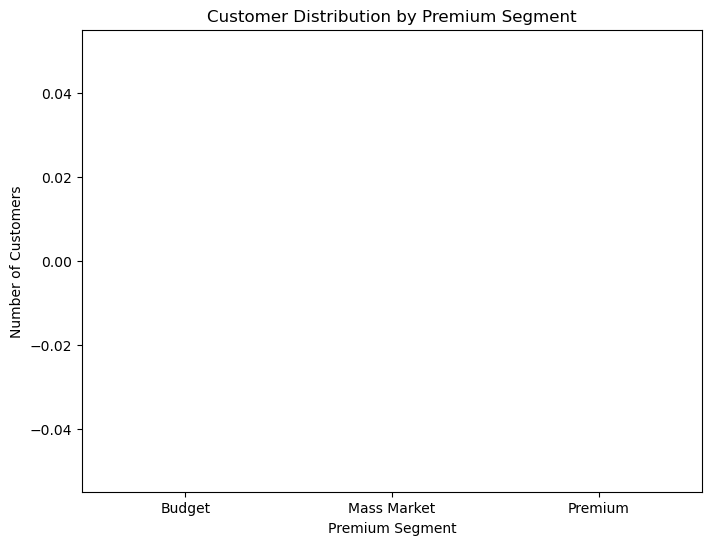

In [368]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PREMIUM_CUSTOMER', data=df, order=['Budget', 'Mass Market', 'Premium']) #Order for better visualization
plt.title('Customer Distribution by Premium Segment')
plt.xlabel('Premium Segment')
plt.ylabel('Number of Customers')
plt.show()

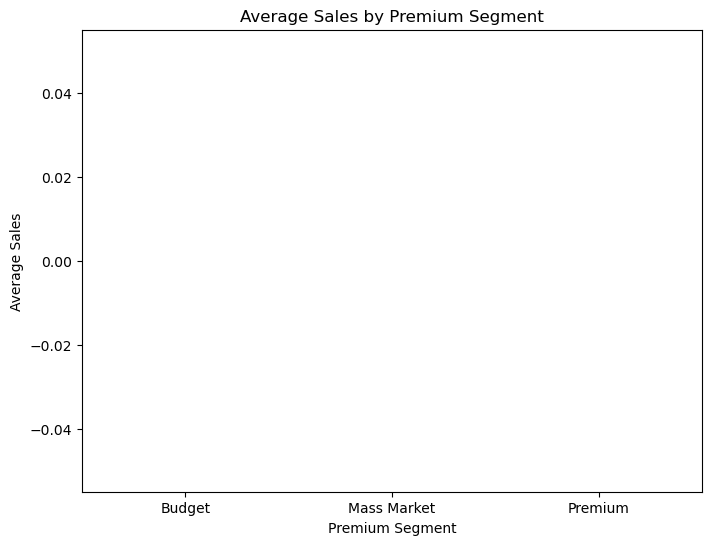

In [370]:
plt.figure(figsize=(8, 6))
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=df, estimator='mean', order=['Budget', 'Mass Market', 'Premium'])
plt.title('Average Sales by Premium Segment')
plt.xlabel('Premium Segment')
plt.ylabel('Average Sales')
plt.show()


plt.show()

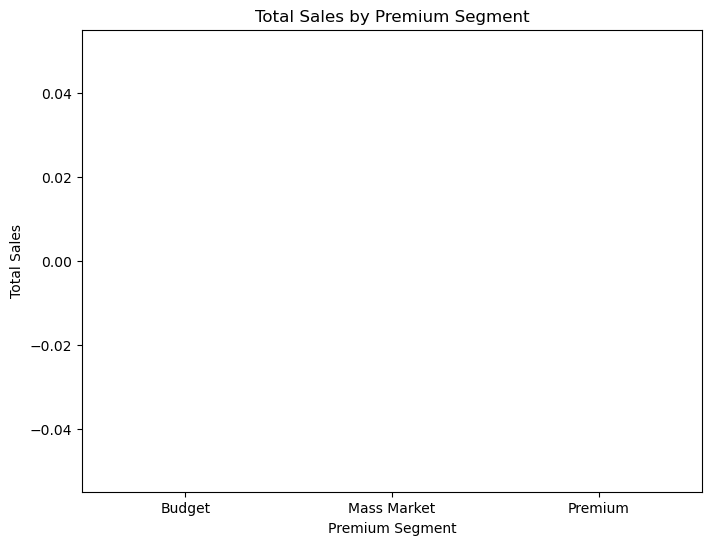

In [369]:
plt.figure(figsize=(8, 6))
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=df, estimator=sum, order=['Budget', 'Mass Market', 'Premium'])
plt.title('Total Sales by Premium Segment')
plt.xlabel('Premium Segment')
plt.ylabel('Total Sales')
plt.show()

In [371]:
# Calculate the percentage of customers in each segment
customer_percentage = df['PREMIUM_CUSTOMER'].value_counts(normalize=True) * 100
print("\nCustomer Percentage by Premium Segment:\n", customer_percentage)



Customer Percentage by Premium Segment:
 PREMIUM_CUSTOMER
mainstream    38.125873
budget        35.494199
premium       26.379929
Name: proportion, dtype: float64
